In [10]:
import autograd.numpy as np  # We need to use this numpy wrapper to make automatic differentiation work later
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [11]:
def Runge_func(x):
    return 1.0/(1 + 25*x**2)

In [12]:
def ReLU(z):
    return np.where(z > 0, z, 0)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def linear(x):
    return x

def tanh(x):
    return np.tanh(x)

def mse(predict, target):
    return np.mean((predict - target) ** 2)

def cross_entropy(predict, target):
    return np.sum(-target * np.log(predict))

def cost_mse(input, layers, activation_funcs, target):
    predict = feed_forward_batch(input, layers, activation_funcs)
    return mse(predict, target)

def cost_cross_entropy(input, layers, activation_funcs, target):
    predict = feed_forward_batch(input, layers, activation_funcs)
    return cross_entropy(predict, target)

In [13]:
def config_simple_network(num_hidden_layers, num_nodes_hlayers, num_output_targets, activation_func_hlayers, activation_func_output):
    """ 
    Take: num_hidden_layers, number of hidden layers,
    num_nodes_hlayers, number of nodes in the hidden layers,
    output_targets, number of targets to predict,
    activation_func_hlayers, activation function used in the hidden layers,
    activation_func_output, activation function for the output layer (can be linear and non linear).
    
    Return: list of layers where each element is number of nodes in layer corresponding to index, last element is output layer,
    and list of activation function for each layer.
    """
    layer_output_sizes = [num_nodes_hlayers]*num_hidden_layers + [num_output_targets]
    activation_funcs = [activation_func_hlayers]*num_hidden_layers + [activation_func_output]

    return layer_output_sizes, activation_funcs

def create_layers_batch(network_input_shape, layer_output_sizes):
    # network_input_shape has shape (number of input vectors, features)
    layers = []

    i_shape = network_input_shape
    for layer_output_size in layer_output_sizes:
        W = np.random.randn(i_shape[1], layer_output_size)
        b = np.random.randn(1, layer_output_size)
        # b = np.tile(b, [i_shape[0],1]) # Explicitly make bias matrix where each column have the same value, corresponding to one bias per node/feature in the layer,
        #                                # and also prevent issues with solely rallying on broadcasting. UPDATE: This will cause problems with different input shapes.
        layers.append((W, b))

        i_shape = (i_shape[0], layer_output_size)
    return layers

def feed_forward_batch(inputs, layers, activation_funcs):
    a = inputs
    for (W, b), activation_func in zip(layers, activation_funcs):
        # print(np.shape(a))
        # print(np.shape(W))
        # print(np.shape(b))
        z = a @ W + b
        a = activation_func(z)
    return a

def train(inputs, targets, layers, activation_funcs, learning_rate=0.01, num_iter=1000, precision=1e-4):
    from autograd import grad
    gradient_func = grad(cost_mse, 1)

    for i in range(num_iter):
        prediction = feed_forward_batch(inputs, layers, activation_funcs)
        error = mse(prediction, targets)
        print(error)
        if error > precision:
            
            layers_grad = gradient_func(inputs, layers, activation_funcs, targets)

            for i_layer in range(len(layers)):
                new_weights = layers[i_layer][0] - learning_rate*layers_grad[i_layer][0]
                new_bias = layers[i_layer][1] - learning_rate*layers_grad[i_layer][1]
                layers[i_layer] = (new_weights, new_bias)

        else:
            print(i)
            break
    
    return layers


def accuracy(predictions, targets):
    one_hot_predictions = np.zeros(predictions.shape)

    for i, prediction in enumerate(predictions):
        one_hot_predictions[i, np.argmax(prediction)] = 1
    return accuracy_score(one_hot_predictions, targets)

In [14]:
np.random.seed(2025)

n = 1000
x = np.linspace(-1, 1, n)
targets = Runge_func(x)# + np.random.normal(0, 0.1, size=n)

x_train, x_test, t_train, t_test = train_test_split(x, targets, test_size=0.2)

x_train = x_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)

scaler = StandardScaler()
scaler.fit(x_train)
x_train_s = scaler.transform(x_train)
x_test_s = scaler.transform(x_test)

In [15]:
from autograd import grad

gradient_func = grad(cost_mse, 1)

In [16]:
np.random.seed(2025)

inputs = x_train_s
targets = t_train

network_input_size = inputs.shape # (individual samples, features)

hidden_layers = 2
nodes_hlayer = 100

learning_rate = 0.01
num_iter = 100

layer_output_sizes, activation_funcs = config_simple_network(num_hidden_layers=hidden_layers,
                                                             num_nodes_hlayers=nodes_hlayer,
                                                             num_output_targets=1,
                                                             activation_func_hlayers=sigmoid,
                                                             activation_func_output=linear)


layers = create_layers_batch(network_input_size, layer_output_sizes)
        
layers_trained = train(inputs, targets, layers, activation_funcs, learning_rate=learning_rate, num_iter=num_iter)

25.80554408730448
8.96444241010228
3.75110091500798
2.188210486537221


1.3601606453043646
0.870810753378924
0.5737486353073395
0.3939807297155214
0.2859720934106538
0.22123947368547314
0.1822556342532628
0.158433345210117
0.14348921507969767
0.13374276941687957
0.1270577572842429
0.12220114338976605
0.1184626251344122
0.11543231846209717
0.11287217675734516
0.11064222056053538
0.10865842763720077
0.10686878569073667
0.10523970102393103
0.1037482911644827
0.10237801092759498
0.10111616403812723
0.09995248031475994
0.09887829503794687
0.09788606894069343
0.09696910130314107
0.0961213529672953
0.09533733235463572
0.09461201799967396
0.09394080261920269
0.0933194502177187
0.09274406138084962
0.09221104396743064
0.09171708757337892
0.09125914079849706
0.09083439072123549
0.09044024420030151
0.09007431074559258
0.08973438677352606
0.08941844110554814
0.08912460159585908
0.0888511427922209
0.088596474546058
0.08835913149716544
0.08813776336546704
0.08793112598814275
0.08773807304548287
0.08755754842327416
0.08738857916351933
0.08723026895893073
0.087081792149975

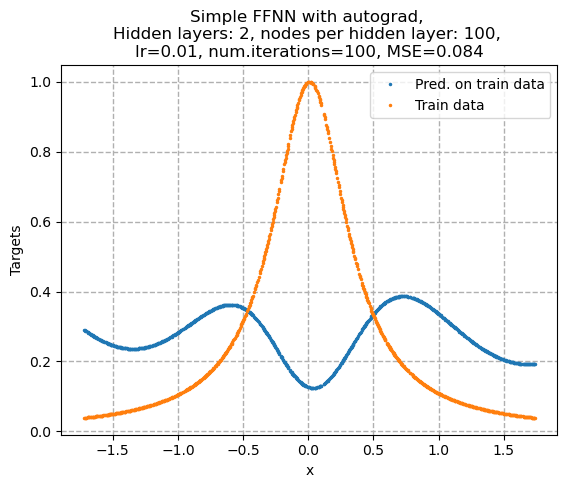

In [35]:
predictions = feed_forward_batch(inputs, layers_trained, activation_funcs)
MSE = mse(predictions, targets)

plt.plot(inputs, predictions, ".", label="Pred. on train data", markersize="3.0")
plt.plot(inputs, targets, ".", label="Train data", markersize="3.0")
plt.title("Simple FFNN with autograd, \n"
          f"Hidden layers: {hidden_layers}, nodes per hidden layer: {nodes_hlayer}, \n"
          f"lr={learning_rate}, num.iterations={num_iter}, MSE={MSE:.3f}")
plt.xlabel("x")
plt.ylabel("Targets")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=1.0)
plt.show()
plt.close()